# Splines cúbicos

In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

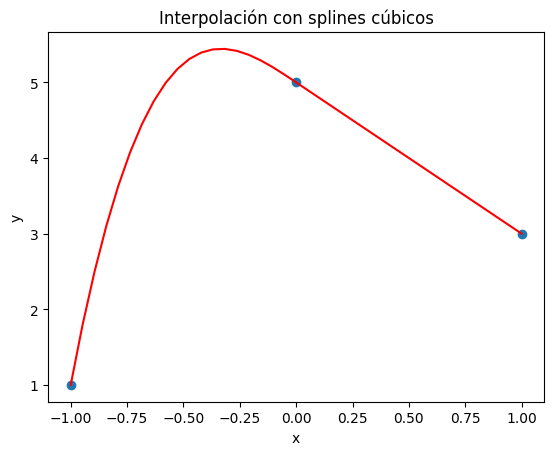

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 16, "c": -18, "d": 6},
    {"a": 5, "b": -2, "c": 0, "d": 0},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

# Tarea
* Grafique los splines cúbicos tal que cumplan con la pendiente $m$ deseada en el punto $(x_1,y_1)$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x0, y0 = -1.0, 1.0
x1, y1 =  0.0, 5.0
x2, y2 =  1.0, 3.0
m = -2.0  


def row_S0(x):
    t = x - x0
    return np.array([1, t, t**2, t**3, 0, 0, 0, 0], dtype=float)

def row_S1(x):
    u = x - x1
    return np.array([0, 0, 0, 0, 1, u, u**2, u**3], dtype=float)

def row_S0p(x):
    t = x - x0
    return np.array([0, 1, 2*t, 3*t**2, 0, 0, 0, 0], dtype=float)

def row_S1p(x):
    u = x - x1
    return np.array([0, 0, 0, 0, 0, 1, 2*u, 3*u**2], dtype=float)

def row_S0pp(x):
    t = x - x0
    return np.array([0, 0, 2, 6*t, 0, 0, 0, 0], dtype=float)

def row_S1pp(x):
    u = x - x1
    return np.array([0, 0, 0, 0, 0, 0, 2, 6*u], dtype=float)

A = []
b = []

# Interpolación
A.append(row_S0(x0)); b.append(y0)
A.append(row_S0(x1)); b.append(y1)
A.append(row_S1(x1)); b.append(y1)
A.append(row_S1(x2)); b.append(y2)

# Continuidad de 2da derivada en x1: S0''(x1) - S1''(x1) = 0
A.append(row_S0pp(x1) - row_S1pp(x1)); b.append(0.0)

# Pendiente única en x1
A.append(row_S0p(x1)); b.append(m)
A.append(row_S1p(x1)); b.append(m)

# Natural derecha (cierra sistema)
A.append(row_S1pp(x2)); b.append(0.0)

A = np.vstack(A)
b = np.array(b, dtype=float)

coef = np.linalg.solve(A, b)
a0, b0, c0, d0, a1, b1, c1, d1 = coef

print("Coeficientes:")
print("S0: a0,b0,c0,d0 =", a0, b0, c0, d0)
print("S1: a1,b1,c1,d1 =", a1, b1, c1, d1)


Coeficientes:
S0: a0,b0,c0,d0 = 1.0 16.0 -18.0 6.0
S1: a1,b1,c1,d1 = 5.0 -2.0 0.0 0.0


In [4]:
import math

def spline_expr(i, a, b, c, d, xi, dec=6):
    
    coeffs = [a, b, c, d]
    if any((isinstance(v, float) and math.isnan(v)) for v in coeffs):
        return f"S{i}(x) = NaN*(x-{xi})^3 + NaN*(x-{xi})^2 + NaN*(x-{xi}) + NaN"

    a = round(float(a), dec)
    b = round(float(b), dec)
    c = round(float(c), dec)
    d = round(float(d), dec)
    xi = round(float(xi), dec)

    return f"S{i}(x) = {a}*(x-{xi})^3 + {b}*(x-{xi})^2 + {c}*(x-{xi}) + {d}"

print(spline_expr(0, a0, b0, c0, d0, x0))
print(spline_expr(1, a1, b1, c1, d1, x1))



S0(x) = 1.0*(x--1.0)^3 + 16.0*(x--1.0)^2 + -18.0*(x--1.0) + 6.0
S1(x) = 5.0*(x-0.0)^3 + -2.0*(x-0.0)^2 + 0.0*(x-0.0) + 0.0
